Some exploratory work for CSCI1420 capstone project.

In [30]:
# import dependencies, requirements file included to run in python venv
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [36]:
# Load and clean data
df = pd.read_csv('LEGO_Data/merged.csv')
df.dropna(subset=['USD_MSRP', 'Current_Price'], inplace=True)
df = df[df['Rating']>0]
df = df.drop_duplicates()
df.info()
df.nunique()


<class 'pandas.core.frame.DataFrame'>
Index: 3225 entries, 0 to 3605
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3225 non-null   int64  
 1   Set_ID            3225 non-null   object 
 2   Name              3225 non-null   object 
 3   Year              3225 non-null   float64
 4   Theme             3225 non-null   object 
 5   Theme_Group       3225 non-null   object 
 6   Subtheme          2791 non-null   object 
 7   Category          3225 non-null   object 
 8   Packaging         3225 non-null   object 
 9   Num_Instructions  3225 non-null   float64
 10  Availability      3225 non-null   object 
 11  Pieces            3224 non-null   float64
 12  Minifigures       2315 non-null   float64
 13  Owned             3225 non-null   float64
 14  Rating            3225 non-null   float64
 15  USD_MSRP          3225 non-null   float64
 16  Total_Quantity    3225 non-null   float64
 17  

Unnamed: 0          3225
Set_ID              3225
Name                3019
Year                  25
Theme                 92
Theme_Group           13
Subtheme             380
Category               4
Packaging             12
Num_Instructions      24
Availability           6
Pieces              1095
Minifigures           23
Owned               2709
Rating                21
USD_MSRP              81
Total_Quantity        96
Current_Price       1402
lastUpdated         3153
US_retailPrice        78
ownedBy             2659
wantedBy            2026
dtype: int64

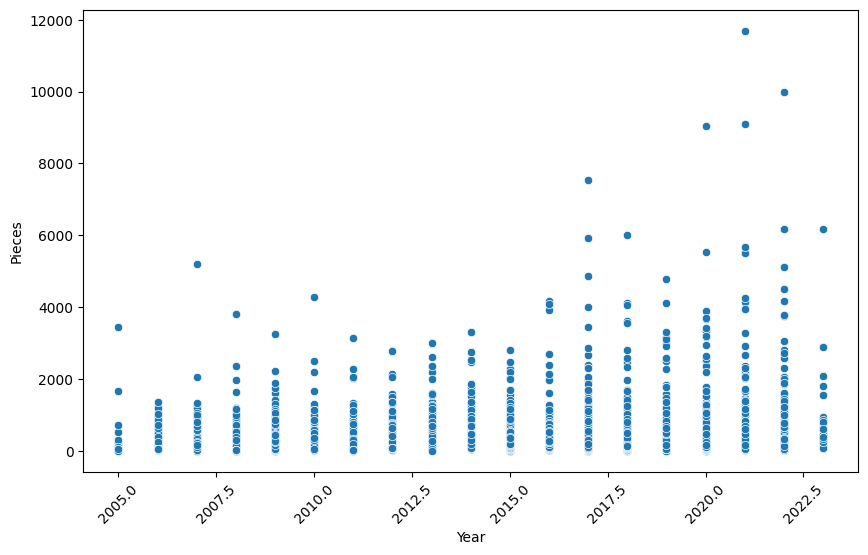

In [69]:
plot_df = df[df['Year'] >= 2005]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df[['Pieces', 'Year']], x="Year", y=('Pieces'))
plt.xlabel('Year')
plt.ylabel('Pieces')
plt.xticks(rotation=45)
plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_12264\1754489519.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = plot_df[df['Year'] < 2022]


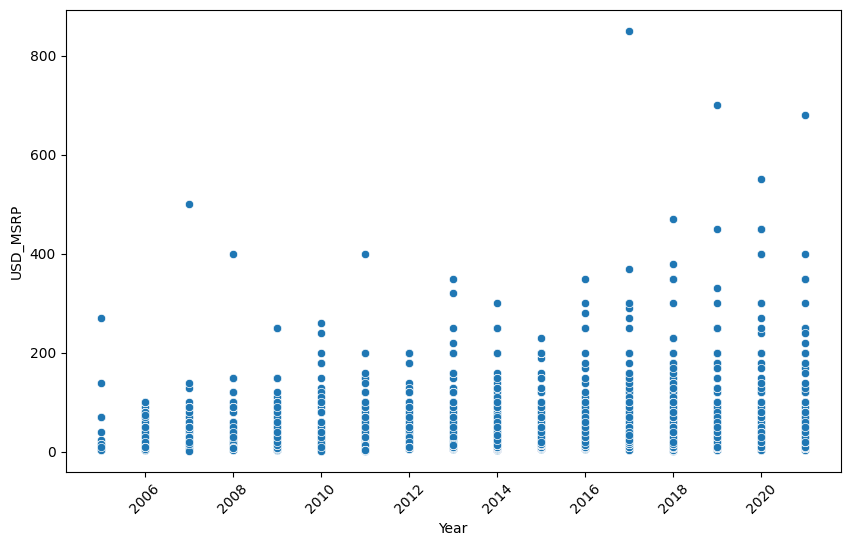

In [63]:
plot_df = df[df['Year'] >= 2005]
plot_df = plot_df[df['Year'] < 2022]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df[['USD_MSRP', 'Year']], x="Year", y=('USD_MSRP'))
plt.xlabel('Year')
plt.ylabel('USD_MSRP')
plt.xticks(rotation=45)
plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_12264\3589542642.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = plot_df[df['Year'] < 2023]
C:\Users\erict\AppData\Local\Temp\ipykernel_12264\3589542642.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = plot_df[df['USD_MSRP'] >= 200]


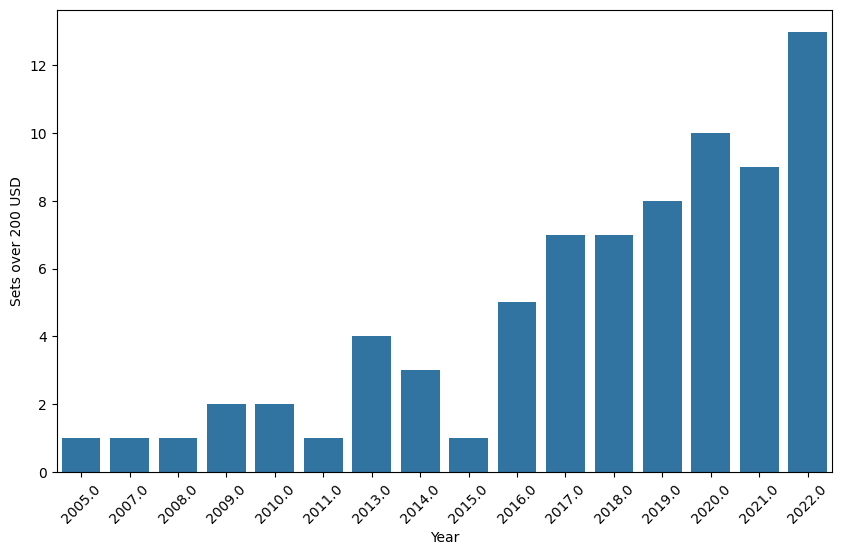

In [85]:
plot_df = df[df['Year'] >= 2005]
plot_df = plot_df[df['Year'] < 2023]
plot_df = plot_df[df['USD_MSRP'] >= 200]

plt.figure(figsize=(10, 6))
sns.countplot(data=plot_df, x="Year")
plt.xlabel('Year')
plt.ylabel('Sets over 200 USD')
plt.xticks(rotation=45)
plt.show()

C:\Users\erict\AppData\Local\Temp\ipykernel_12264\2859966965.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_df = plot_df[df['Year'] < 2022]


6      NaN
7      NaN
10     NaN
11     NaN
12     NaN
        ..
3601   NaN
3602   NaN
3603   NaN
3604   NaN
3605   NaN
Name: >100_count, Length: 3015, dtype: float64


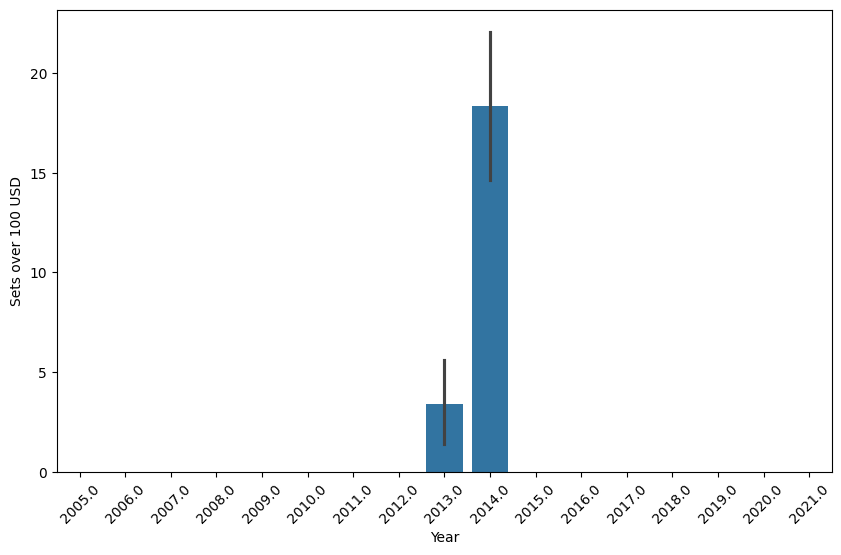

In [67]:
plot_df = df[df['Year'] >= 2005]
plot_df = plot_df[df['Year'] < 2022]
plot_df['>100_count'] = plot_df[df['USD_MSRP'] > 100].count()

plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df[['>100_count', 'Year']], x="Year", y='>100_count')
plt.xlabel('Year')
plt.ylabel('Sets over 100 USD')
plt.xticks(rotation=45)
plt.show()

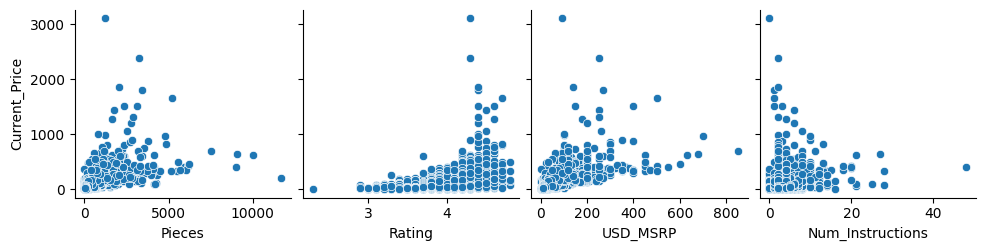

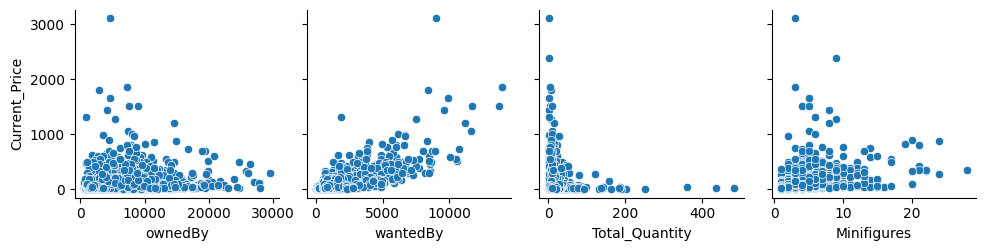

In [42]:
# pairplots between features and price
sns.pairplot(df, 
             x_vars=["Pieces", "Rating", "USD_MSRP", "Num_Instructions"],
             y_vars= ['Current_Price'])
sns.pairplot(df, 
             x_vars=["ownedBy", "wantedBy", "Total_Quantity", "Minifigures"],
             y_vars= ['Current_Price'])

Using the pair plots, we can check for relationships, outliers, clusters, and distributions in the LEGO sets we're analyzing.
Most of out attributes appear very loosely correlated with Current_Price (Pieces, Rating, USD_MSRP, Quantity appear most promising).

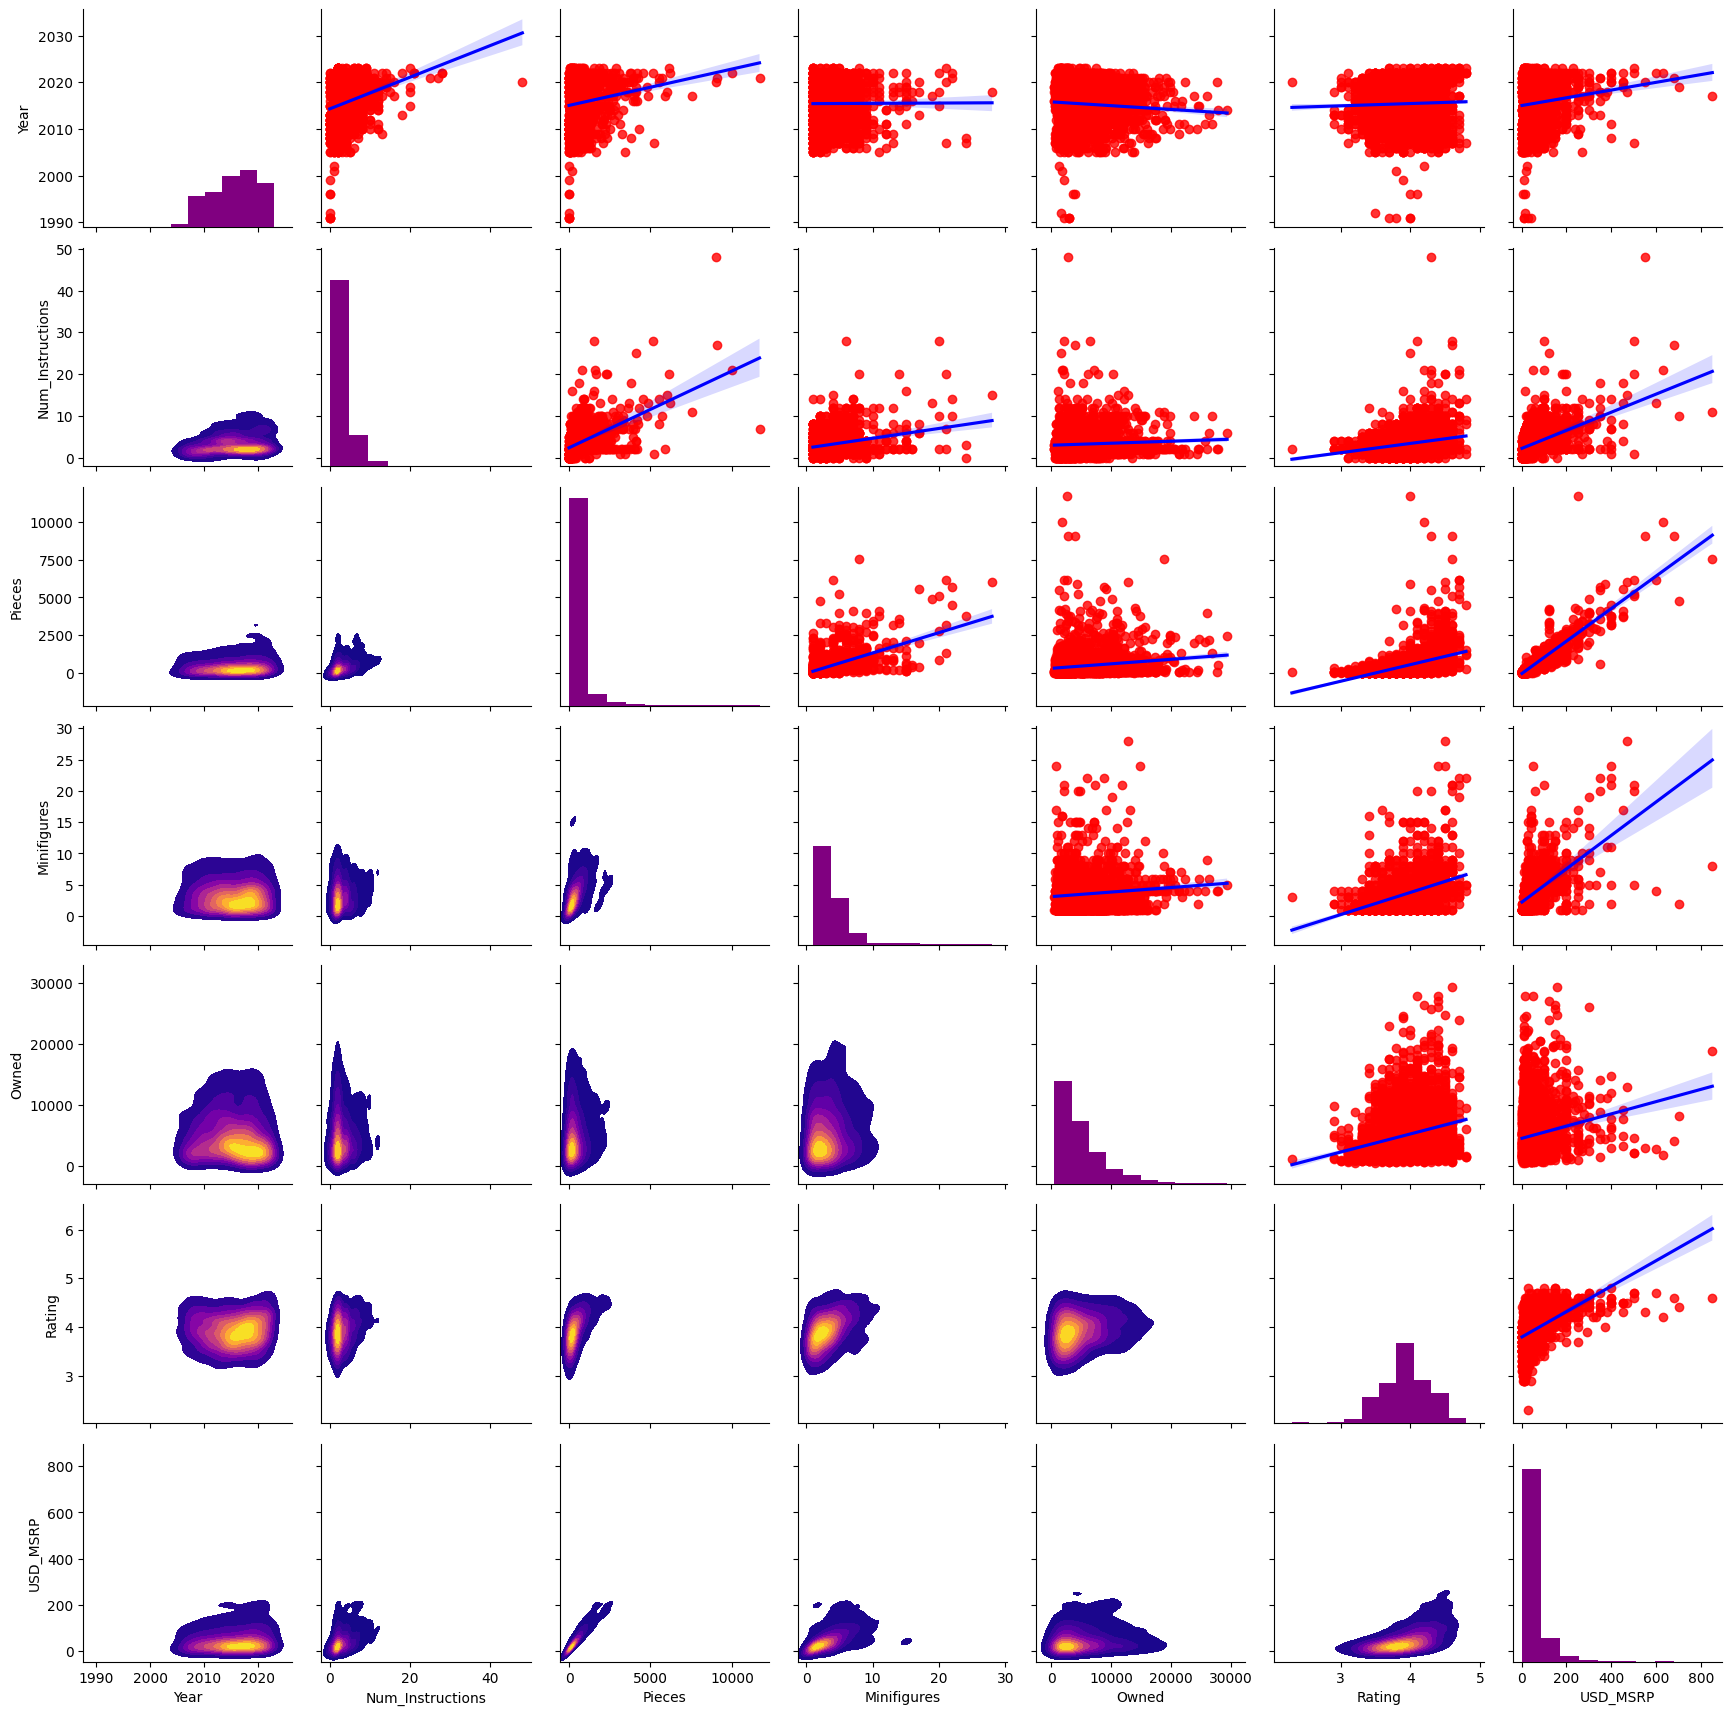

In [11]:
# pair plots between features
pg = sns.PairGrid(df[['Year', 'Num_Instructions', 'Pieces', 'Minifigures', 'Owned', 'Rating', 'USD_MSRP']])
pg.map_upper(sns.regplot,scatter_kws={"color": "red"}, line_kws={"color": "blue"})
pg.map_lower(sns.kdeplot, cmap="plasma", fill=True, thresh=0.05)
pg.map_diag(plt.hist, color='purple')

We can also visualize the pair plots between some of the features we are using for prediction to gain a sense for relationships between them.

0.05 3099.99


<function matplotlib.pyplot.show(close=None, block=None)>

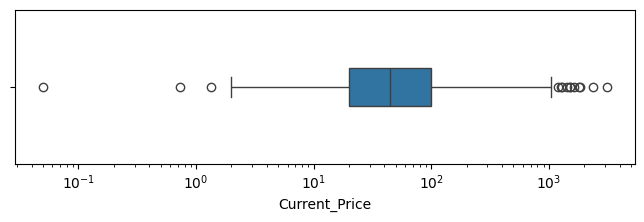

In [49]:
fig, ax = plt.subplots(figsize=(8,2))
sns.boxplot(df["Current_Price"], orient='h', log_scale=True, width=0.25, ax=ax)
print(min(df["Current_Price"]), max(df["Current_Price"]))
plt.show